In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')
sns.set(rc={'figure.figsize':(25,10)})

%matplotlib inline

In [2]:
df = pd.read_csv('SuperStore - data.csv')

In [4]:
df.columns

Index(['Order_ID', 'Customer_ID', 'Postal_Code', 'Product_ID', 'Sales',
       'Quantity', 'Discount', 'Profit', 'Category', 'Sub-Category',
       'Product_Name', 'Order_Date', 'Ship_Date', 'Ship_Mode', 'Customer_Name',
       'Segment', 'Country/Region', 'City', 'State', 'Region'],
      dtype='object')

In [5]:
df.head()

,Order_ID,Customer_ID,Postal_Code,Product_ID,Sales,Quantity,Discount,Profit,Category,Sub-Category,Product_Name,Order_Date,Ship_Date,Ship_Mode,Customer_Name,Segment,Country/Region,City,State,Region
0,CA-2019-152156,CG-12520,42420,FUR-BO-10001798,261.9600,2,0.00,41.9136,Furniture,Bookcases,Bush Somerset Collection Bookcase,11/8/2019,11/11/2019,Second Class,Claire Gute,Consumer,United States,Henderson,Kentucky,South
1,CA-2019-152156,CG-12520,42420,FUR-CH-10000454,731.9400,3,0.00,219.5820,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",11/8/2019,11/11/2019,Second Class,Claire Gute,Consumer,United States,Henderson,Kentucky,South
2,CA-2019-138688,DV-13045,90036,OFF-LA-10000240,14.6200,2,0.00,6.8714,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,6/12/2019,6/16/2019,Second Class,Darrin Van Huff,Corporate,United States,Los Angeles,California,West
3,US-2018-108966,SO-20335,33311,FUR-TA-10000577,957.5775,5,0.45,-383.0310,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,10/11/2018,10/18/2018,Standard Class,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,South
4,US-2018-108966,SO-20335,33311,OFF-ST-10000760,22.3680,2,0.20,2.5164,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,10/11/2018,10/18/2018,Standard Class,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,South


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Order_ID        9994 non-null   object 
 1   Customer_ID     9994 non-null   object 
 2   Postal_Code     9994 non-null   int64  
 3   Product_ID      9994 non-null   object 
 4   Sales           9994 non-null   float64
 5   Quantity        9994 non-null   int64  
 6   Discount        9994 non-null   float64
 7   Profit          9994 non-null   float64
 8   Category        9994 non-null   object 
 9   Sub-Category    9994 non-null   object 
 10  Product_Name    9994 non-null   object 
 11  Order_Date      9994 non-null   object 
 12  Ship_Date       9994 non-null   object 
 13  Ship_Mode       9994 non-null   object 
 14  Customer_Name   9994 non-null   object 
 15  Segment         9994 non-null   object 
 16  Country/Region  9994 non-null   object 
 17  City            9994 non-null   o

In [8]:
df.isnull().sum()

Order_ID          0
Customer_ID       0
Postal_Code       0
Product_ID        0
Sales             0
Quantity          0
Discount          0
Profit            0
Category          0
Sub-Category      0
Product_Name      0
Order_Date        0
Ship_Date         0
Ship_Mode         0
Customer_Name     0
Segment           0
Country/Region    0
City              0
State             0
Region            0
dtype: int64

In [9]:
df = df.dropna(axis=0)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Order_ID        9994 non-null   object 
 1   Customer_ID     9994 non-null   object 
 2   Postal_Code     9994 non-null   int64  
 3   Product_ID      9994 non-null   object 
 4   Sales           9994 non-null   float64
 5   Quantity        9994 non-null   int64  
 6   Discount        9994 non-null   float64
 7   Profit          9994 non-null   float64
 8   Category        9994 non-null   object 
 9   Sub-Category    9994 non-null   object 
 10  Product_Name    9994 non-null   object 
 11  Order_Date      9994 non-null   object 
 12  Ship_Date       9994 non-null   object 
 13  Ship_Mode       9994 non-null   object 
 14  Customer_Name   9994 non-null   object 
 15  Segment         9994 non-null   object 
 16  Country/Region  9994 non-null   object 
 17  City            9994 non-null   o

In [13]:
# Format dates
df['Order_Date'] = pd.to_datetime(df['Order_Date'])
df['Ship_Date'] = pd.to_datetime(df['Ship_Date'])

In [ ]:
df.head()

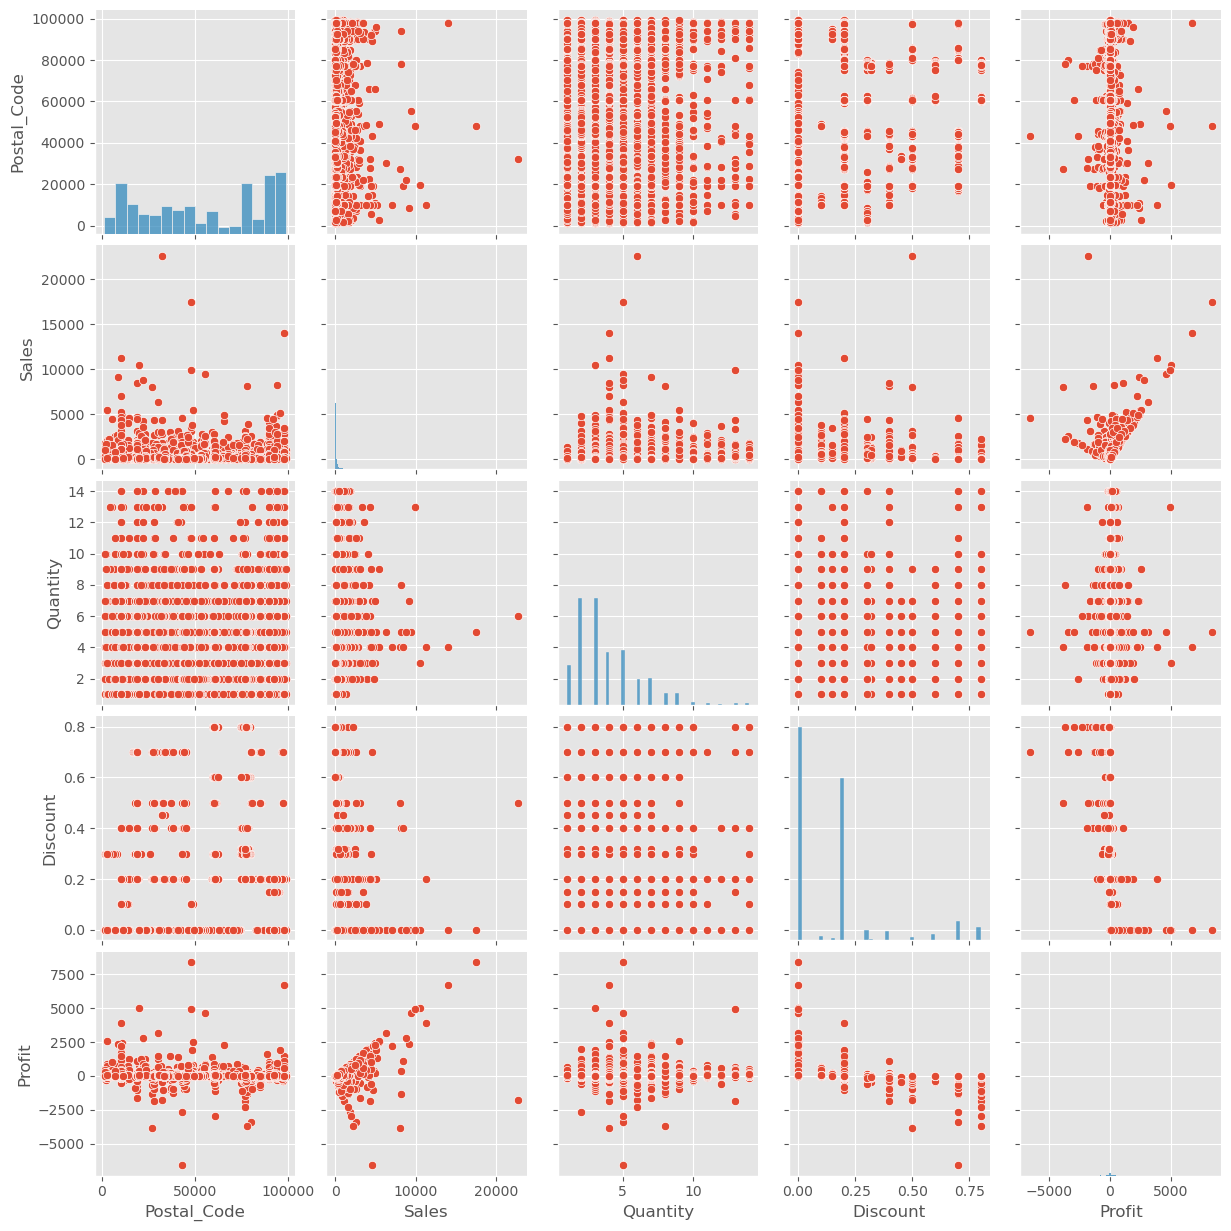

In [16]:
sns.pairplot(df)

### Scatter plots

In [21]:
# Trend order (quantity, sales, discount, profit)
trend_stack_1 = df[['Order_Date', 'Quantity', 'Discount', 'Sales', 'Profit']]

trend_stack_1.head()

,Order_Date,Quantity,Discount,Sales,Profit
0,2019-11-08,2,0.00,261.9600,41.9136
1,2019-11-08,3,0.00,731.9400,219.5820
2,2019-06-12,2,0.00,14.6200,6.8714
3,2018-10-11,5,0.45,957.5775,-383.0310
4,2018-10-11,2,0.20,22.3680,2.5164


In [ ]:
'''
# Set the range of years you want to select
start_year = 2011
end_year = 2013

# Select rows where the year is within the specified range
mask = (df['Date'].dt.year >= start_year) & (df['Date'].dt.year <= end_year)
selected_rows = df.loc[mask]
'''


In [24]:
# Pilih rentang tahun

mask_2017_2018 = (df['Order_Date'].dt.year >= 2017) & (df['Order_Date'].dt.year <= 2018)
mask_2018_2019 = (df['Order_Date'].dt.year >= 2018) & (df['Order_Date'].dt.year <= 2019)
mask_2019_2020 = (df['Order_Date'].dt.year >= 2019) & (df['Order_Date'].dt.year <= 2020)
mask_2020_2021 = (df['Order_Date'].dt.year >= 2020) & (df['Order_Date'].dt.year <= 2021)

trend_2017_2018 = trend_stack_1.loc[mask_2017_2018]
trend_2018_2019 = trend_stack_1.loc[mask_2018_2019]
trend_2019_2020 = trend_stack_1.loc[mask_2019_2020]
trend_2020_2021 = trend_stack_1.loc[mask_2020_2021]

## Trend penjualan dan keuntungan

In [205]:
trend_sales = pd.pivot_table(
    data=df,
    index=['Order_Date', 'Category'],
    values='Sales',
    aggfunc=np.sum
)

In [206]:
trend_profit = pd.pivot_table(
    data=df,
    index=['Order_Date', 'Category'],
    values='Profit',
    aggfunc=np.sum
)

In [43]:
trend_sales

Sales
Order_Date Category                 
2017-01-03 Office Supplies    16.448
2017-01-04 Office Supplies   288.060
2017-01-05 Office Supplies    19.536
2017-01-06 Furniture        2573.820
           Office Supplies   685.340
...                              ...
2020-12-29 Office Supplies   282.440
           Technology        302.376
2020-12-30 Furniture         323.136
           Office Supplies   299.724
           Technology         90.930

[2860 rows x 1 columns]

In [54]:
trend_profit

Profit
Order_Date Category                   
2017-01-03 Office Supplies    5.551200
2017-01-04 Office Supplies  -21.996700
2017-01-05 Office Supplies    4.884000
2017-01-06 Furniture        746.407800
           Office Supplies   48.976867
...                                ...
2020-12-29 Office Supplies   25.826400
           Technology        22.678200
2020-12-30 Furniture         12.117600
           Office Supplies   17.338200
           Technology         2.727900

[2860 rows x 1 columns]

Text(0, 0.5, 'Sales')

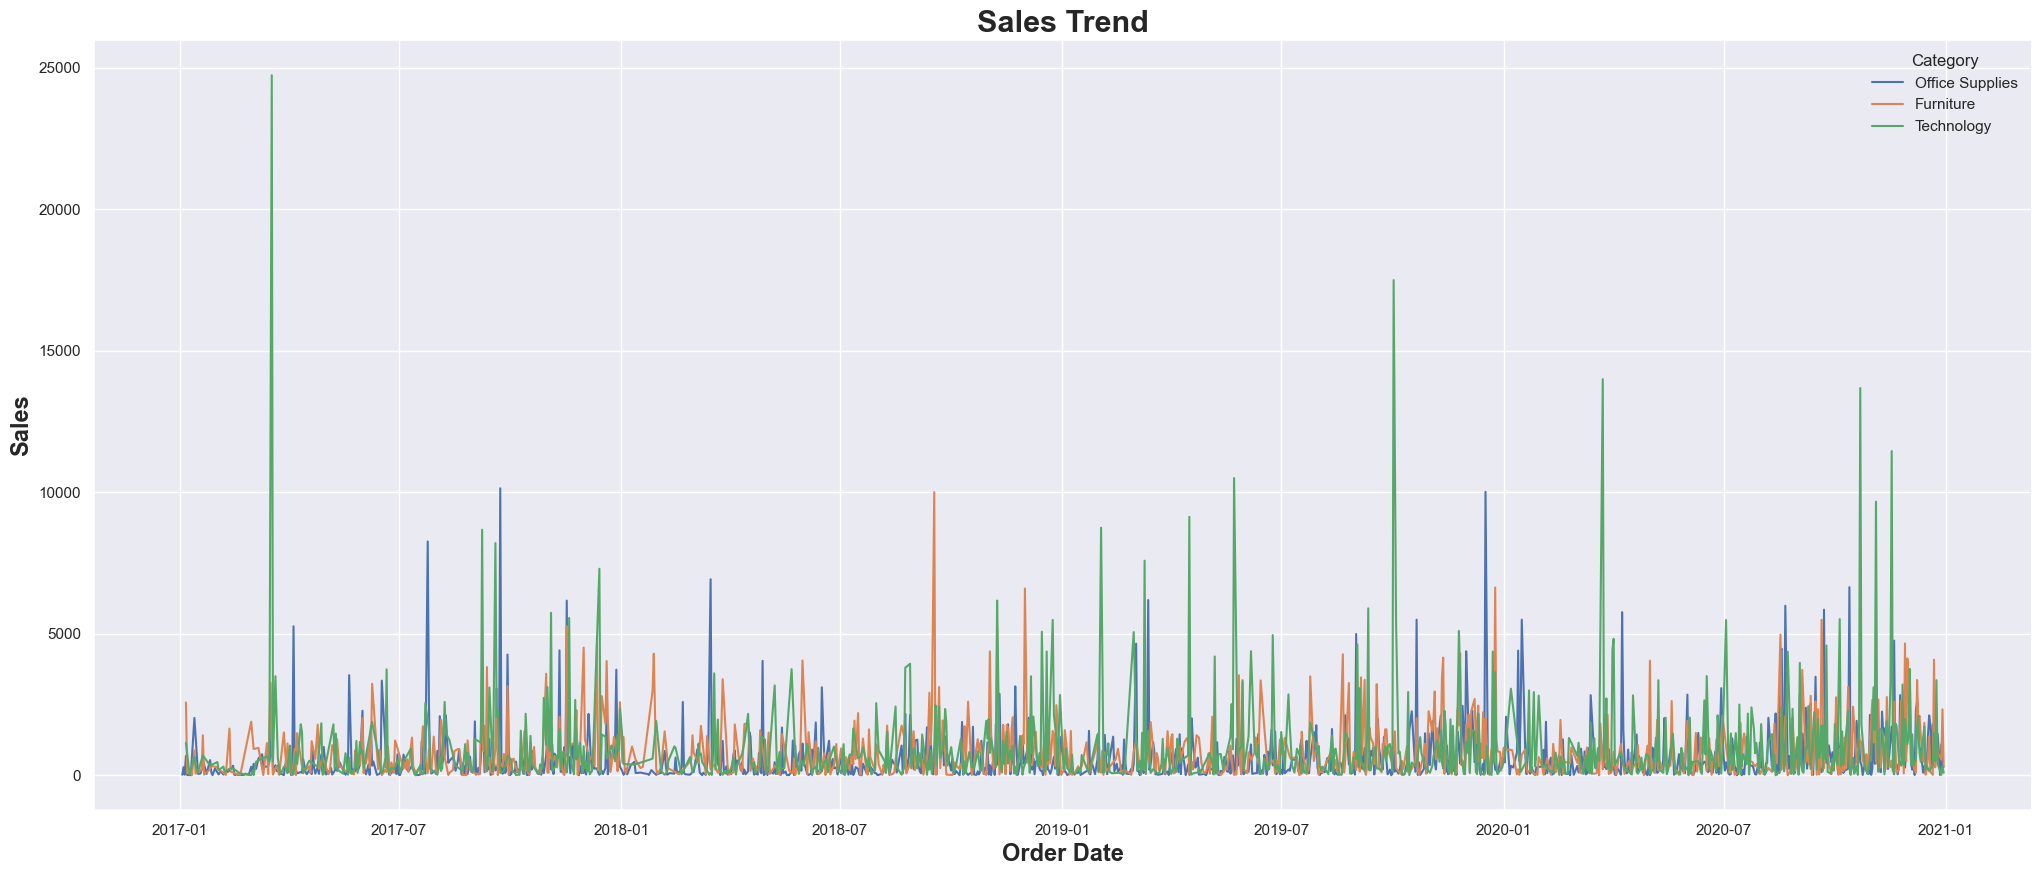

In [208]:
# Plot trend stack 1 untuk melihat tren order
# tahun 2017-2020

plt.style.use('ggplot')

sns.set(rc={'figure.figsize':(25,10)})

ax_trend_sales = sns.lineplot(data=trend_sales, x='Order_Date', y='Sales', hue='Category')
ax_trend_sales.set_title('Sales Trend', fontdict={'size': 22, 'weight': 'bold'})
ax_trend_sales.set_xlabel('Order Date', fontdict={'size': 17, 'weight': 'bold'})
ax_trend_sales.set_ylabel('Sales', fontdict={'size': 17, 'weight': 'bold'})


Text(0, 0.5, 'Profit')

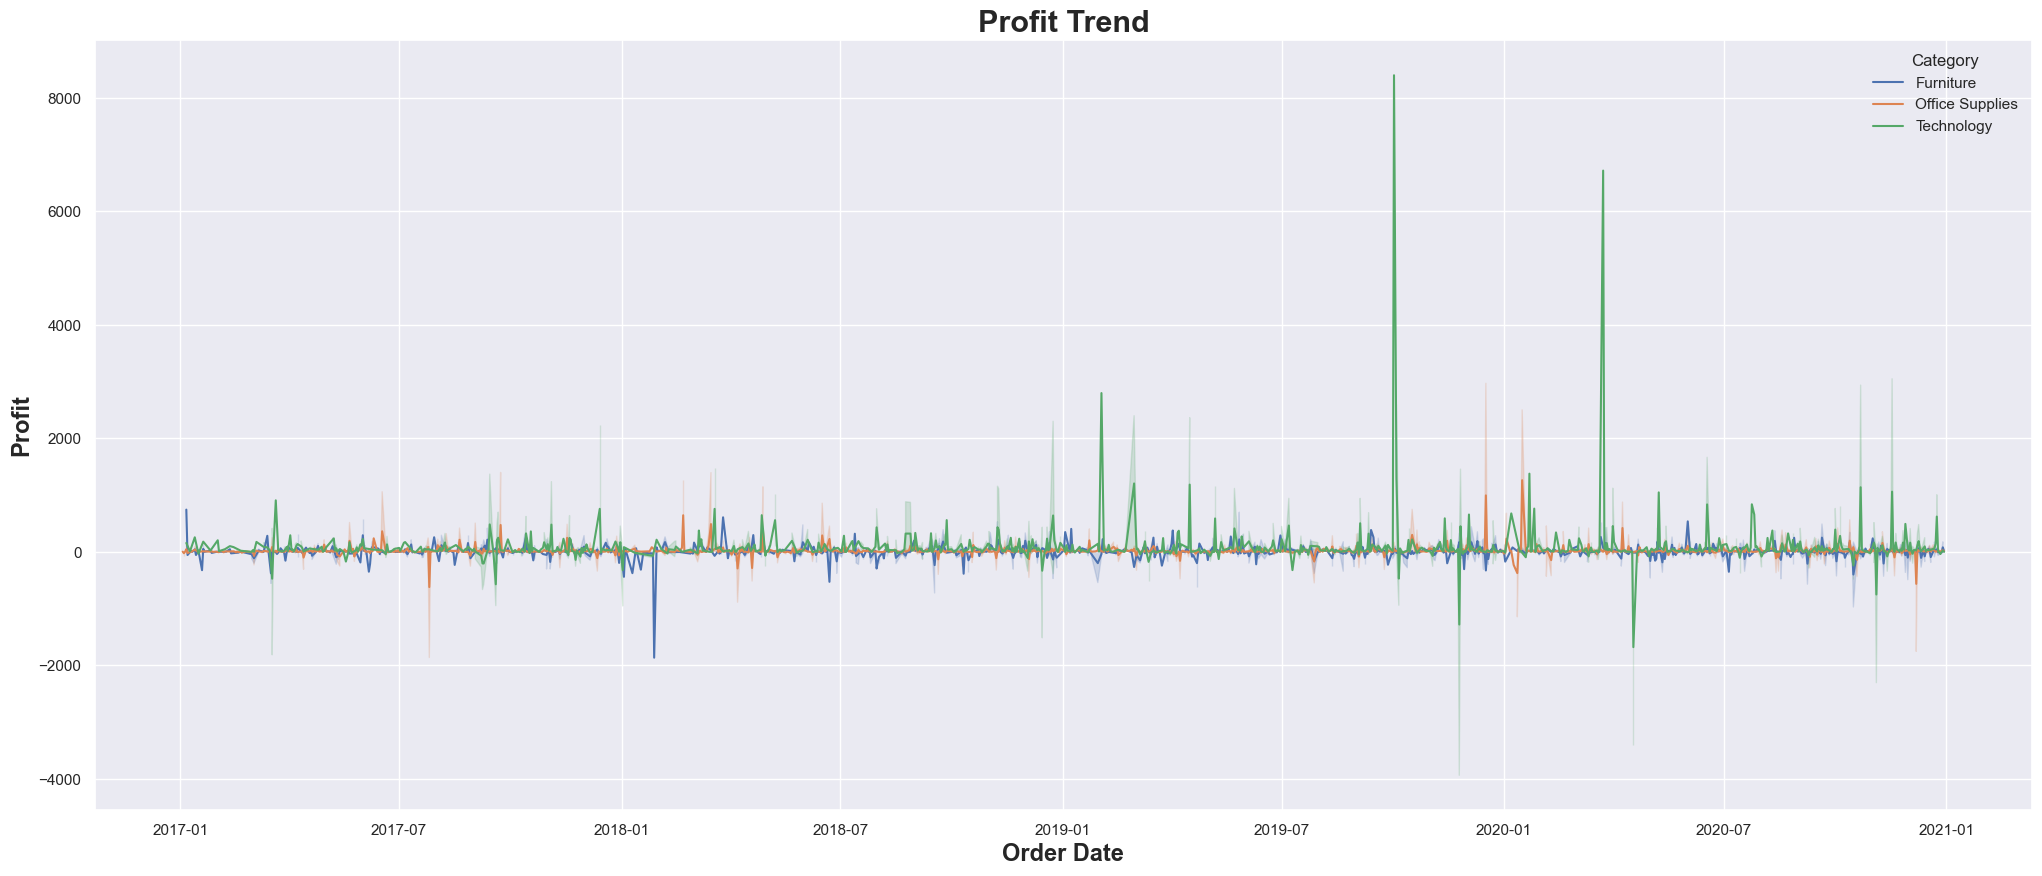

In [209]:
plt.style.use('ggplot')

sns.set(rc={'figure.figsize':(25,10)})

ax_trend_profit = sns.lineplot(data=df, x='Order_Date', y='Profit', hue='Category')
ax_trend_profit.set_title('Profit Trend', fontdict={'size': 22, 'weight': 'bold'})
ax_trend_profit.set_xlabel('Order Date', fontdict={'size': 17, 'weight': 'bold'})
ax_trend_profit.set_ylabel('Profit', fontdict={'size': 17, 'weight': 'bold'})

## Distribusi/sebaran order : total

In [36]:
# Distribusi / sebaran order berdasarkan segment dan region
data_sales_segment_region = pd.pivot_table(
    data=df,
    index=['Segment', 'Region'],
    values='Sales',
    aggfunc=np.sum
).reset_index()

In [69]:
data_sales_segment_region.head()

,Segment,Region,Sales
0,Consumer,Central,252031.4340
1,Consumer,East,350908.1670
2,Consumer,South,195580.9710
3,Consumer,West,362880.7730
4,Corporate,Central,157995.8128


Text(0, 0.5, 'Sales')

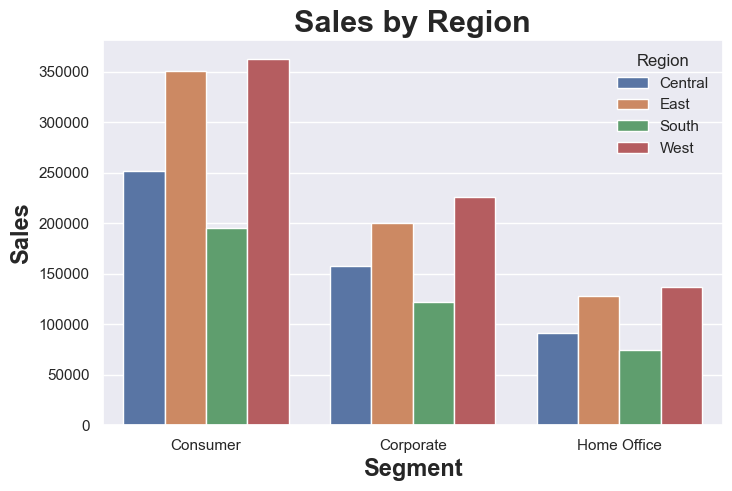

In [215]:
sns.set(rc={'figure.figsize':(8,5)})

ax_segment_sales_region = sns.barplot(data=data_sales_segment_region, x='Segment', y='Sales', hue='Region')
ax_segment_sales_region.set_title('Sales by Region', fontdict={'size': 22, 'weight': 'bold'})
ax_segment_sales_region.set_xlabel('Segment', fontdict={'size': 17, 'weight': 'bold'})
ax_segment_sales_region.set_ylabel('Sales', fontdict={'size': 17, 'weight': 'bold'})

In [39]:
# Distribusi / sebaran order berdasarkan segment dan states
data_sales_segment_state = pd.pivot_table(
    data=df,
    index=['Segment', 'State'],
    values='Sales',
    aggfunc=np.sum
).reset_index()

In [40]:
data_sales_segment_state_sorted_head = data_sales_segment_state.sort_values(by='Sales', ascending=False).head(10).reset_index().drop('index', axis=1)
data_sales_segment_state_sorted_head

,Segment,State,Sales
0,Consumer,California,229636.0800
1,Consumer,New York,175209.0350
2,Corporate,California,147174.7265
3,Consumer,Texas,95976.3780
4,Home Office,California,80876.8250
5,Corporate,New York,77951.3130
6,Consumer,Washington,73866.5200
7,Consumer,Pennsylvania,66899.2930
8,Home Office,New York,57715.9230
9,Corporate,Texas,53908.1198


In [41]:
data_sales_segment_state_sorted_tail = data_sales_segment_state.sort_values(by='Sales', ascending=False).tail(10).reset_index().drop('index', axis=1)
data_sales_segment_state_sorted_tail

,Segment,State,Sales
0,Consumer,West Virginia,673.344
1,Home Office,West Virginia,536.480
2,Home Office,Arkansas,412.340
3,Home Office,Idaho,307.740
4,Home Office,District of Columbia,111.680
5,Home Office,Maine,106.080
6,Corporate,Montana,48.188
7,Consumer,South Dakota,45.730
8,Home Office,North Dakota,28.380
9,Home Office,South Carolina,25.920


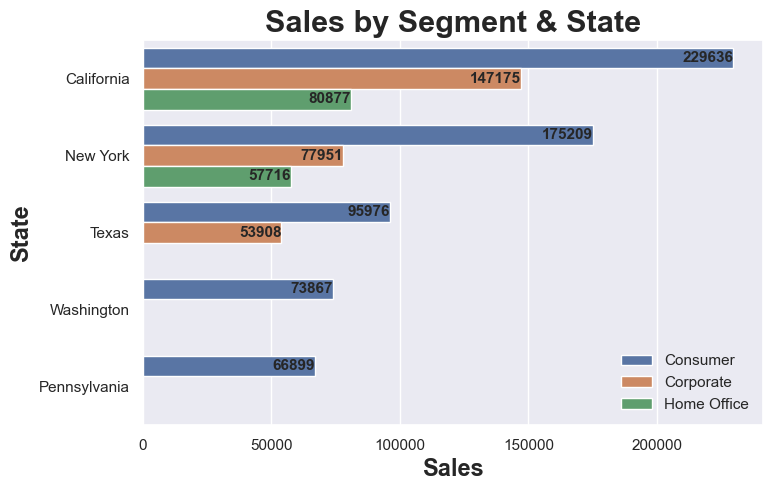

In [216]:
sns.set(rc={'figure.figsize':(8,5)})

ax_segment_sales_state_sorted_head = sns.barplot(data=data_sales_segment_state_sorted_head, x='Sales', y='State', hue='Segment')
ax_segment_sales_state_sorted_head.set_title('Sales by Segment & State', fontdict={'size': 22, 'weight': 'bold'})
ax_segment_sales_state_sorted_head.set_xlabel('Sales', fontdict={'size': 17, 'weight': 'bold'})
ax_segment_sales_state_sorted_head.set_ylabel('State', fontdict={'size': 17, 'weight': 'bold'})

# Move the legend to the bottom right corner
ax_segment_sales_state_sorted_head.legend(loc='lower right', bbox_to_anchor=(1, 0))

for p in ax_segment_sales_state_sorted_head.patches:
    width = p.get_width()
    ax_segment_sales_state_sorted_head.annotate(f'{width:.0f}', (width, p.get_y() + p.get_height() / 2), ha='right', va='center', fontsize=11, fontweight='bold')

### Berdasarkan kategori dan state

In [72]:
data_sales_category_state = pd.pivot_table(
    data=df,
    index=['Category', 'State'],
    values='Sales',
    aggfunc=np.sum
).reset_index()

In [73]:
data_sales_category_state_sorted_head = data_sales_category_state.sort_values(by='Sales', ascending=False).head(10).reset_index().drop('index', axis=1)
data_sales_category_state_sorted_head

,Category,State,Sales
0,Technology,California,159271.0820
1,Furniture,California,156064.6015
2,Office Supplies,California,142351.9480
3,Technology,New York,127483.5000
4,Furniture,New York,93372.7290
5,Office Supplies,New York,90020.0420
6,Technology,Texas,65104.2240
7,Furniture,Texas,60593.2918
8,Technology,Washington,50536.7100
9,Furniture,Washington,48020.1520


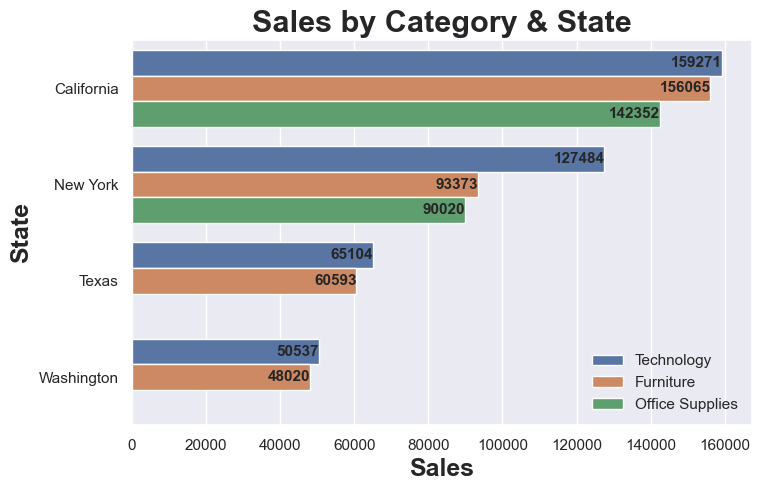

In [218]:
sns.set(rc={'figure.figsize':(8,5)})

ax_sales_category_state_sorted_head = sns.barplot(data=data_sales_category_state_sorted_head, x='Sales', y='State', hue='Category')
ax_sales_category_state_sorted_head.set_title('Sales by Category & State', fontdict={'size': 22, 'weight': 'bold'})
ax_sales_category_state_sorted_head.set_xlabel('Sales', fontdict={'size': 18, 'weight': 'bold'})
ax_sales_category_state_sorted_head.set_ylabel('State', fontdict={'size': 18, 'weight': 'bold'})

ax_sales_category_state_sorted_head.legend(loc='lower right', bbox_to_anchor=(1, 0))

for p in ax_sales_category_state_sorted_head.patches:
    width = p.get_width()
    ax_sales_category_state_sorted_head.annotate(f'{width:.0f}', (width, p.get_y() + p.get_height() / 2), ha='right', va='center', fontsize=11, fontweight='bold')

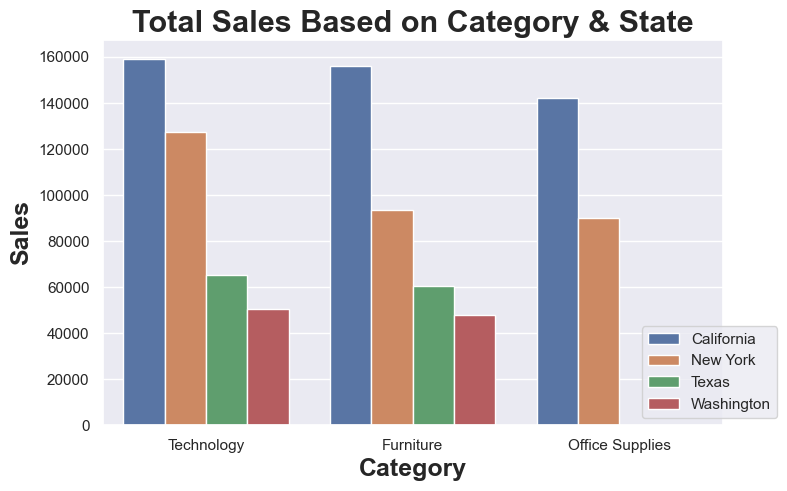

In [86]:
sns.set(rc={'figure.figsize':(8,5)})

ax_sales_category_state_sorted_head = sns.barplot(data=data_sales_category_state_sorted_head, x='Category', y='Sales', hue='State')
ax_sales_category_state_sorted_head.set_title('Total Sales Based on Category & State', fontdict={'size': 22, 'weight': 'bold'})
ax_sales_category_state_sorted_head.set_xlabel('Category', fontdict={'size': 18, 'weight': 'bold'})
ax_sales_category_state_sorted_head.set_ylabel('Sales', fontdict={'size': 18, 'weight': 'bold'})

ax_sales_category_state_sorted_head.legend(loc='lower right', bbox_to_anchor=(1.1, 0))

### Berdasarkan State

### Berdasarkan City

In [200]:
data_sales_city = pd.pivot_table(
    data=df,
    index=['City', 'State'],
    values='Sales',
    aggfunc=np.sum
).reset_index()

In [201]:
data_sales_city_sorted_head = data_sales_city.sort_values(by='Sales', ascending=False).head(10).reset_index().drop('index', axis=1)
data_sales_city_sorted_head

,City,State,Sales
0,New York City,New York,256368.1610
1,Los Angeles,California,175851.3410
2,Seattle,Washington,119540.7420
3,San Francisco,California,112669.0920
4,Philadelphia,Pennsylvania,109077.0130
5,Houston,Texas,64504.7604
6,Chicago,Illinois,48539.5410
7,San Diego,California,42651.6070
8,Detroit,Michigan,42446.9440
9,Jacksonville,Florida,39133.3280


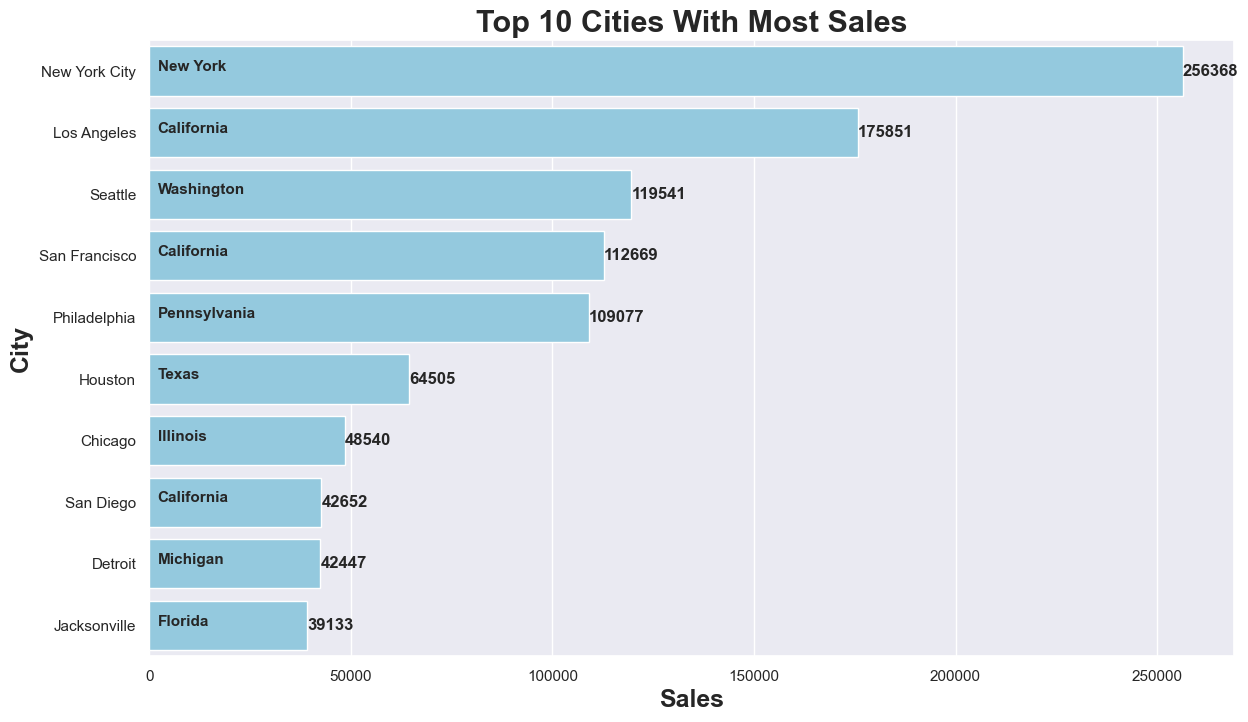

In [227]:
sns.set(rc={'figure.figsize':(14,8)})

ax_sales_city_sorted_head = sns.barplot(data=data_sales_city_sorted_head, x='Sales', y='City', color='skyblue')
ax_sales_city_sorted_head.set_title('Top 10 Cities With Most Sales', fontdict={'size': 22, 'weight': 'bold'})
ax_sales_city_sorted_head.set_xlabel('Sales', fontdict={'size': 18, 'weight': 'bold'})
ax_sales_city_sorted_head.set_ylabel('City', fontdict={'size': 18, 'weight': 'bold'})
# ax_sales_city_sorted_head.bar_label(ax_sales_city_sorted_head.containers[0])

plt.style.use('seaborn-white')

# Adding state labels to the bars
for p in ax_sales_city_sorted_head.patches:
    width = p.get_width()
    ax_sales_city_sorted_head.annotate(f'{width:.0f}', (width, p.get_y() + p.get_height() / 2), ha='left', va='center', fontsize=12, fontweight='bold')
    
for index, row in data_sales_city_sorted_head.iterrows():
    city = row['City']
    state = row['State']
    ax_sales_city_sorted_head.annotate(state, (0, index), xytext=(6, 0), textcoords='offset points', fontsize=11, fontweight='bold')

    
plt.show()

In [ ]:
data_sales_city_reg = pd.pivot_table(
    data=df,
    index=['City', 'State', 'Region'],
    values='Sales',
    aggfunc=np.sum
).reset_index()

In [ ]:
sns.set(rc={'figure.figsize':(14,8)})
plt.style.use('seaborn-white')

ax_data_sales_city_reg = sns.barplot(data=data_sales_city_reg, x='Sales', y='City', color='skyblue')
ax_data_sales_city_reg.set_title('Top 10 Cities With Most Sales', fontdict={'size': 22, 'weight': 'bold'})
ax_data_sales_city_reg.set_xlabel('Sales', fontdict={'size': 18, 'weight': 'bold'})
ax_data_sales_city_reg.set_ylabel('City', fontdict={'size': 18, 'weight': 'bold'})
# ax_sales_city_sorted_head.bar_label(ax_sales_city_sorted_head.containers[0])

# Adding state labels to the bars
for p in ax_data_sales_city_reg.patches:
    width = p.get_width()
    ax_data_sales_city_reg.annotate(f'{width:.0f}', (width, p.get_y() + p.get_height() / 2), ha='left', va='center', fontsize=12, fontweight='bold')
    
for index, row in ax_data_sales_city_reg.iterrows():
    city = row['City']
    state = row['State']
    ax_data_sales_city_reg.annotate(state, (0, index), xytext=(6, 0), textcoords='offset points', fontsize=11, fontweight='bold')
    
for index, row in ax_data_sales_city_reg.iterrows():
    city = row['City']
    region = row['Region']
    ax_data_sales_city_reg.annotate(region, (0, index), xytext=(14, 0), textcoords='offset points', fontsize=11, fontweight='bold')

    
plt.show()

### Berdasarkan sub-category dan state

In [87]:
data_sales_subcategory_state = pd.pivot_table(
    data=df,
    index=['Sub-Category', 'State'],
    values='Sales',
    aggfunc=np.sum
).reset_index()

In [99]:
data_sales_subcategory_state_sorted_head = data_sales_subcategory_state.sort_values(by='Sales', ascending=False).head(10).reset_index().drop('index', axis=1)
data_sales_subcategory_state_sorted_head

,Sub-Category,State,Sales
0,Phones,California,67964.536
1,Chairs,California,63079.368
2,Phones,New York,47502.620
3,Chairs,New York,46634.247
4,Tables,California,45430.232
5,Storage,California,45112.290
6,Machines,New York,43183.500
7,Accessories,California,37255.010
8,Binders,New York,32456.912
9,Machines,California,29492.016


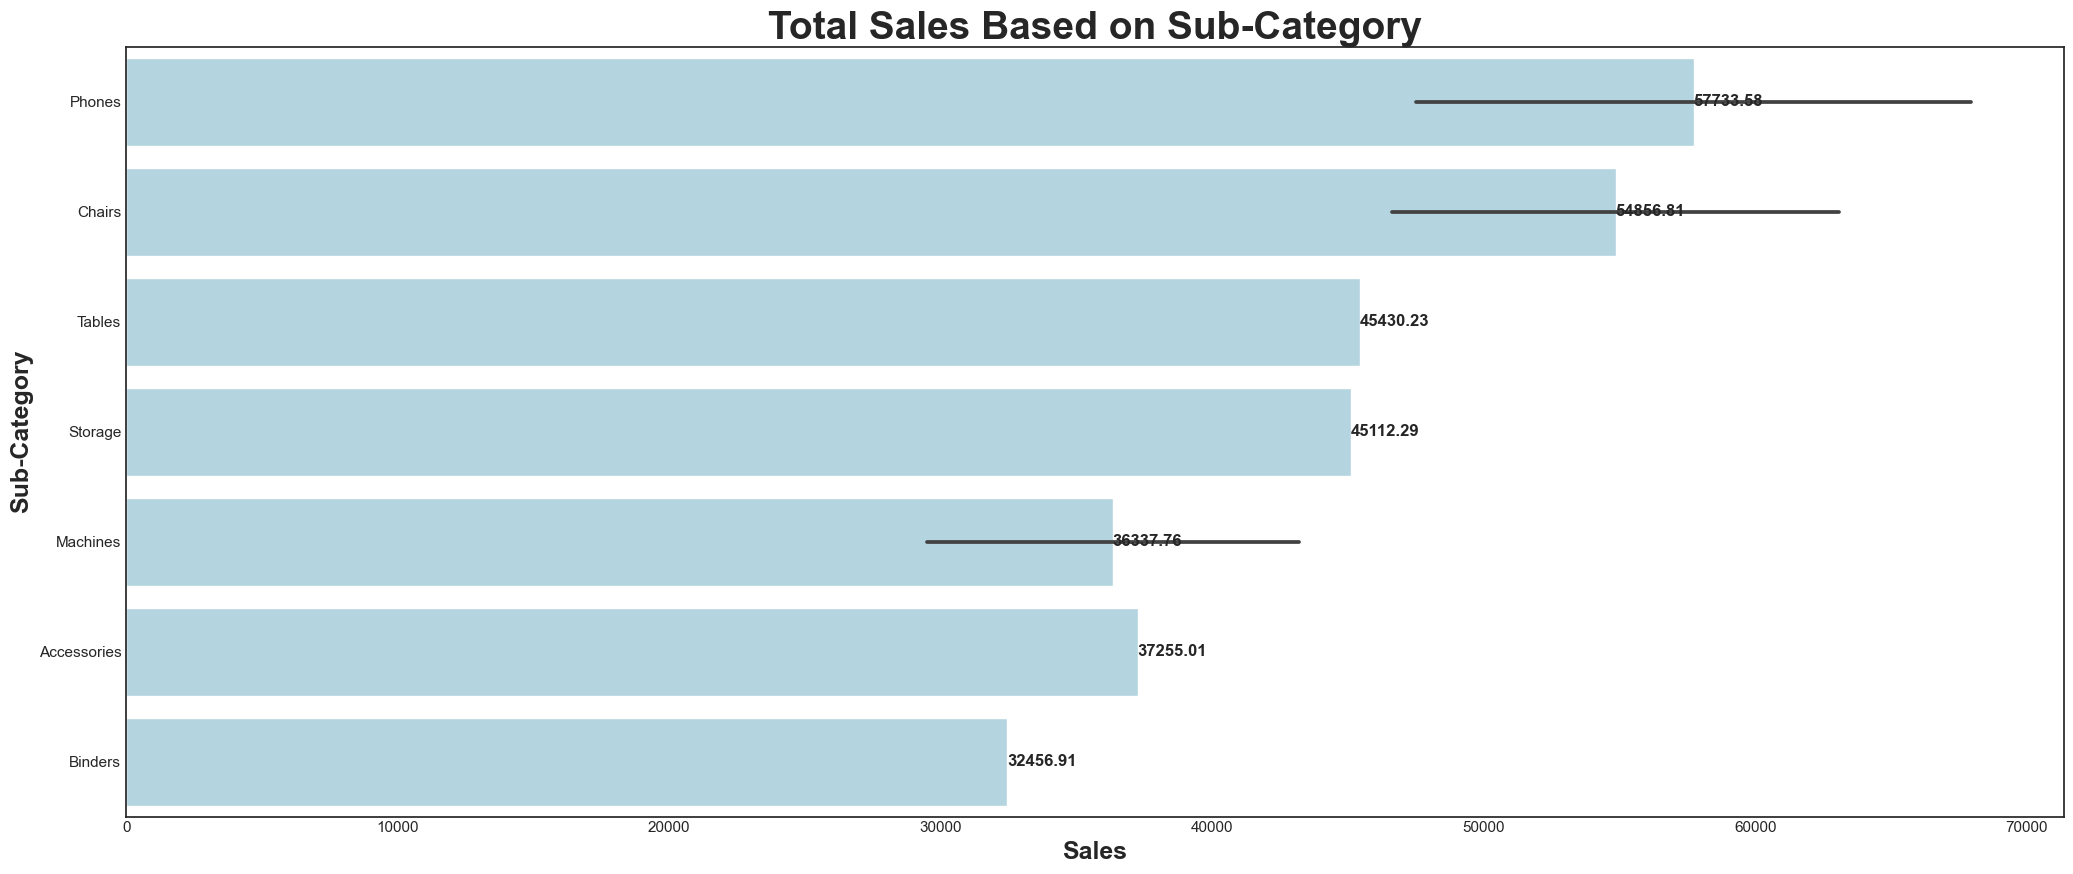

In [159]:
ax_sales_subcategory_state_sorted_head = sns.barplot(data=data_sales_subcategory_state_sorted_head, x='Sales', y='Sub-Category', color='lightblue')
ax_sales_subcategory_state_sorted_head.set_title('Total Sales Based on Sub-Category', fontdict={'size': 28, 'weight': 'bold'})
ax_sales_subcategory_state_sorted_head.set_xlabel('Sales', fontdict={'size': 18, 'weight': 'bold'})
ax_sales_subcategory_state_sorted_head.set_ylabel('Sub-Category', fontdict={'size': 18, 'weight': 'bold'})

for p in ax_sales_subcategory_state_sorted_head.patches:
    width = p.get_width()
    ax_sales_subcategory_state_sorted_head.annotate(f'{width:.2f}', (width, p.get_y() + p.get_height() / 2), ha='left', va='center', fontsize=12, fontweight='bold')

### Total Profit Per Sub-Category

In [169]:
df_total_profit_customer = df.groupby(['Sub-Category'], as_index=False).agg(total_profit = ('Profit', pd.Series.sum))

df_total_profit_customer_sorted = df_total_profit_customer.sort_values(by = ['total_profit'], ascending=False, ignore_index=True)

df_total_profit_customer_sorted

,Sub-Category,total_profit
0,Copiers,55617.8249
1,Phones,44515.7306
2,Accessories,41936.6357
3,Paper,34053.5693
4,Binders,30221.7633
5,Chairs,26590.1663
6,Storage,21278.8264
7,Appliances,18138.0054
8,Furnishings,13059.1436
9,Envelopes,6964.1767


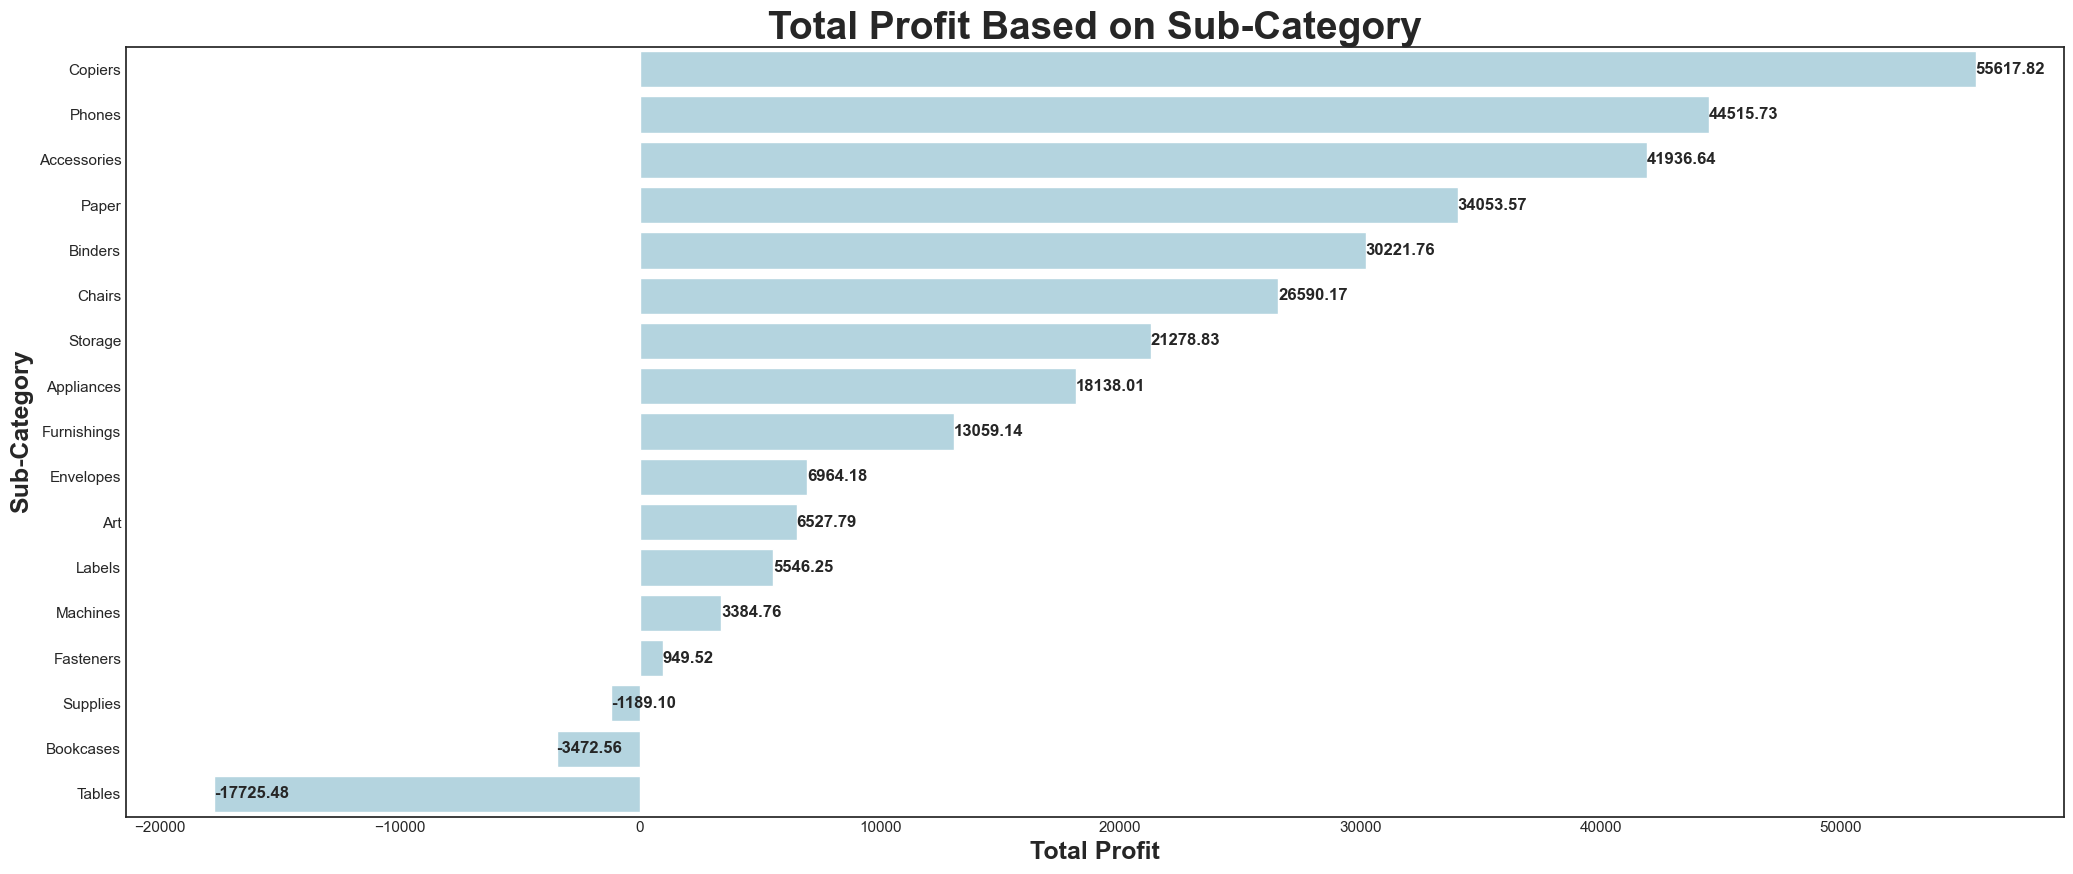

In [173]:
ax_df_total_profit_customer_sorted = sns.barplot(data=df_total_profit_customer_sorted, x='total_profit', y='Sub-Category', color='lightblue')
ax_df_total_profit_customer_sorted.set_title('Total Profit Based on Sub-Category', fontdict={'size': 28, 'weight': 'bold'})
ax_df_total_profit_customer_sorted.set_xlabel('Total Profit', fontdict={'size': 18, 'weight': 'bold'})
ax_df_total_profit_customer_sorted.set_ylabel('Sub-Category', fontdict={'size': 18, 'weight': 'bold'})

for p in ax_df_total_profit_customer_sorted.patches:
    width = p.get_width()
    ax_df_total_profit_customer_sorted.annotate(f'{width:.2f}', (width, p.get_y() + p.get_height() / 2), ha='left', va='center', fontsize=12, fontweight='bold')

### Total Sales Per Sub Category

In [171]:
df_total_sales_customer = df.groupby(['Sub-Category'], as_index=False).agg(total_sales = ('Sales', pd.Series.sum))

df_total_sales_customer_sorted = df_total_sales_customer.sort_values(by = ['total_sales'], ascending=False, ignore_index=True)

df_total_sales_customer_sorted

,Sub-Category,total_sales
0,Phones,330007.0540
1,Chairs,328449.1030
2,Storage,223843.6080
3,Tables,206965.5320
4,Binders,203412.7330
5,Machines,189238.6310
6,Accessories,167380.3180
7,Copiers,149528.0300
8,Bookcases,114879.9963
9,Appliances,107532.1610


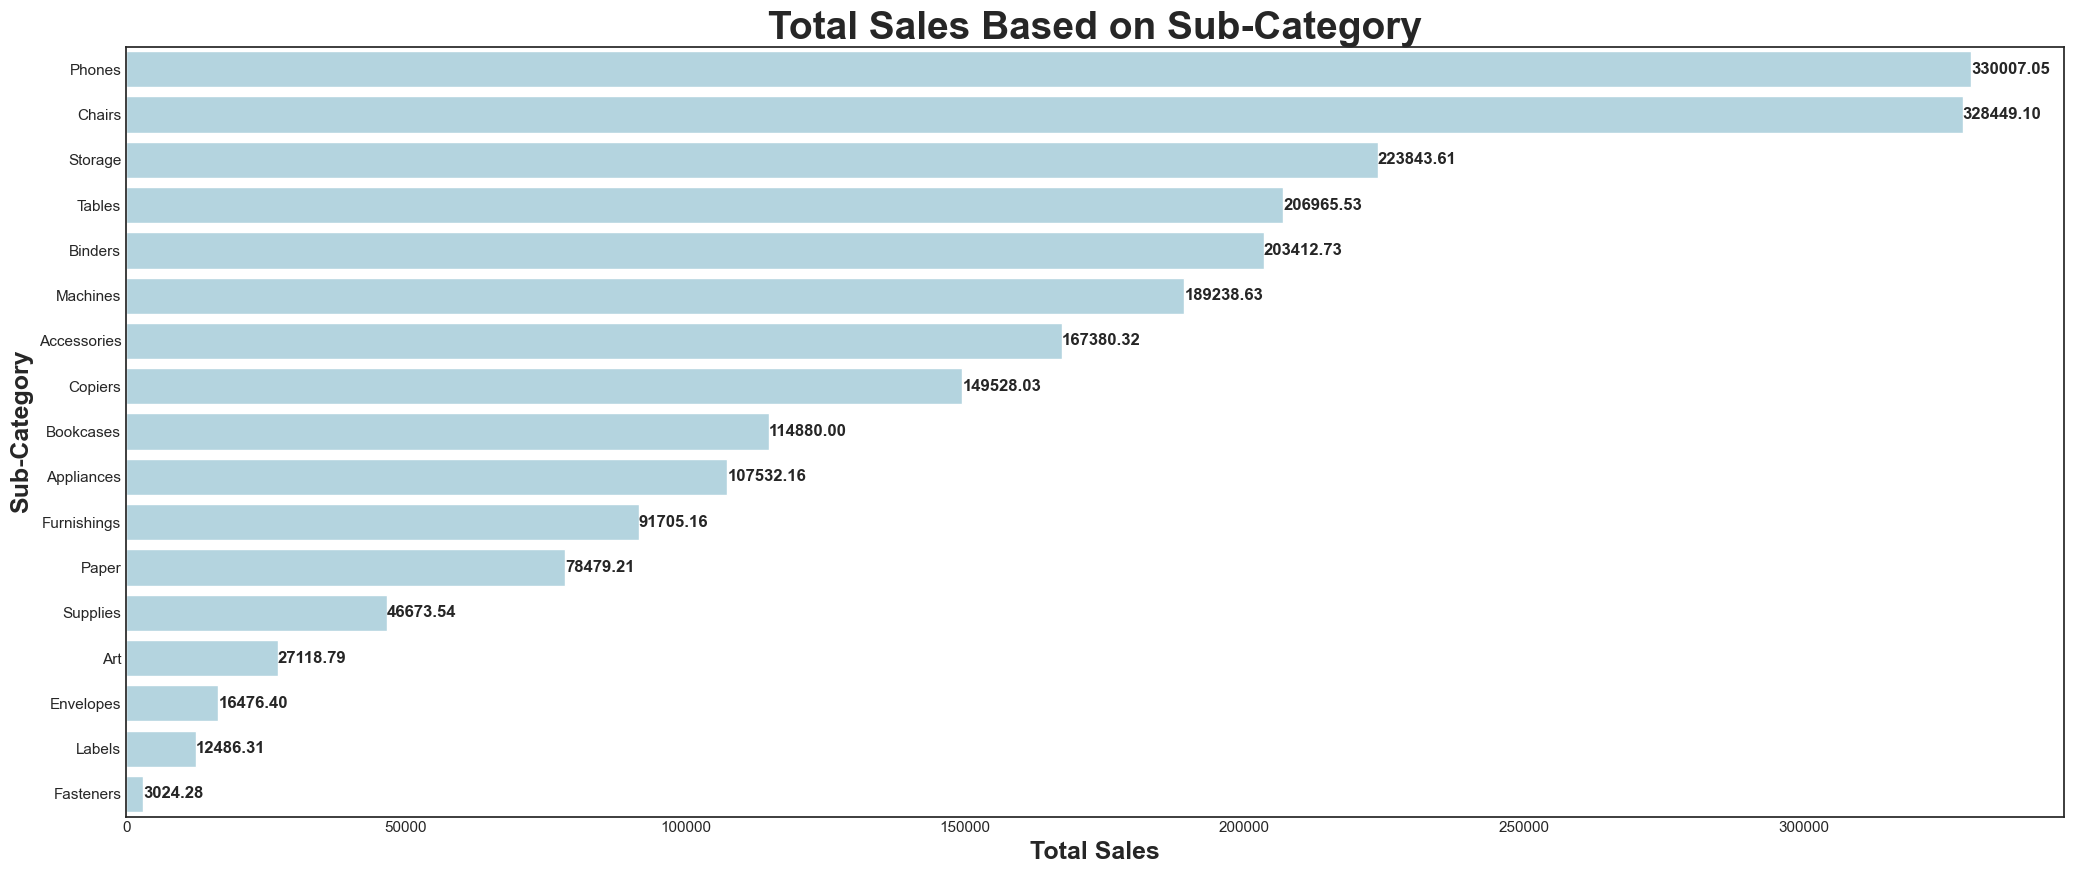

In [174]:
ax_df_total_sales_customer_sorted = sns.barplot(data=df_total_sales_customer_sorted, x='total_sales', y='Sub-Category', color='lightblue')
ax_df_total_sales_customer_sorted.set_title('Total Sales Based on Sub-Category', fontdict={'size': 28, 'weight': 'bold'})
ax_df_total_sales_customer_sorted.set_xlabel('Total Sales', fontdict={'size': 18, 'weight': 'bold'})
ax_df_total_sales_customer_sorted.set_ylabel('Sub-Category', fontdict={'size': 18, 'weight': 'bold'})

for p in ax_df_total_sales_customer_sorted.patches:
    width = p.get_width()
    ax_df_total_sales_customer_sorted.annotate(f'{width:.2f}', (width, p.get_y() + p.get_height() / 2), ha='left', va='center', fontsize=12, fontweight='bold')

### Jumlah Customer

In [18]:
# df_total_customer = df.groupby(['Customer_ID'], as_index=False).agg('count')

# df_total_customer = df.groupby(['Order_Date'], as_index=False)['Customer_ID'].nunique()

df['Year'] = df['Order_Date'].dt.year

df_total_customer = df.groupby(['Year'], as_index=False)['Customer_ID'].nunique()
# df_total_customer_sorted = df_total_customer.sort_values(by = ['total_sales'], ascending=False, ignore_index=True)

# df_total_customer_sorted

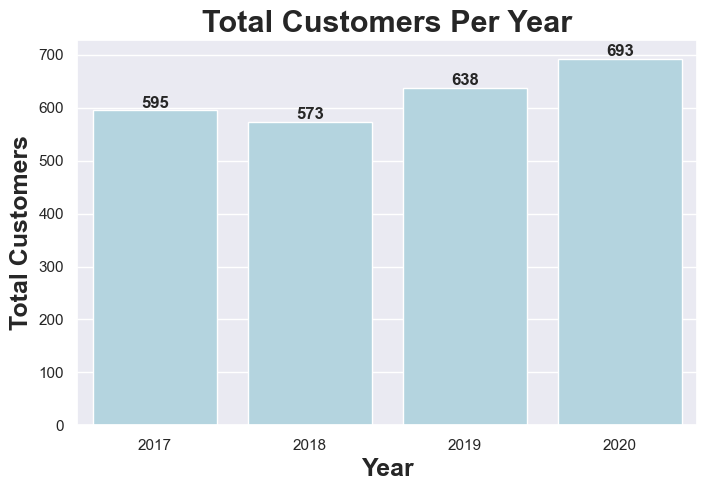

In [33]:
sns.set(rc={'figure.figsize':(8,5)})

ax_df_total_customer = sns.barplot(data=df_total_customer, x='Year', y='Customer_ID', color='lightblue')
ax_df_total_customer.set_title('Total Customers Per Year', fontdict={'size': 22, 'weight': 'bold'})
ax_df_total_customer.set_xlabel('Year', fontdict={'size': 18, 'weight': 'bold'})
ax_df_total_customer.set_ylabel('Total Customers', fontdict={'size': 18, 'weight': 'bold'})

for p in ax_df_total_customer.patches:
    height = p.get_height()
    ax_df_total_customer.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2, height), ha='center', va='bottom', fontsize=12, fontweight='bold')

#for p in ax_df_total_customer.patches:
#    width = p.get_width()
#    ax_df_total_customer.annotate(f'{width:.2f}', (width, p.get_y() + p.get_height() / 2), ha='left', va='center', fontsize=12, fontweight='bold')

In [188]:
df_total_customer_2 = df.groupby(['Year', 'Category'], as_index=False)['Customer_ID'].nunique()

df_total_customer_2

,Year,Category,Customer_ID
0,2017,Furniture,290
1,2017,Office Supplies,509
2,2017,Technology,250
3,2018,Furniture,289
4,2018,Office Supplies,502
5,2018,Technology,276
6,2019,Furniture,355
7,2019,Office Supplies,545
8,2019,Technology,290
9,2020,Furniture,403


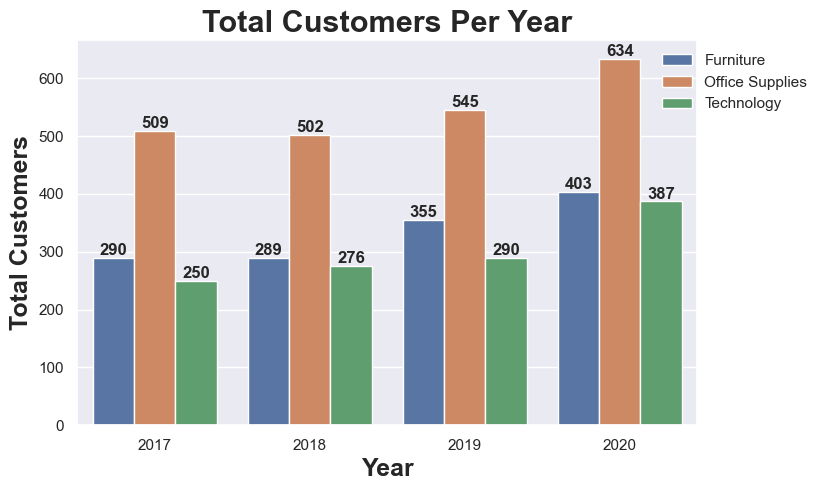

In [199]:
sns.set(rc={'figure.figsize':(8,5)})

ax_df_total_customer_2 = sns.barplot(data=df_total_customer_2, x='Year', y='Customer_ID', hue='Category')
ax_df_total_customer_2.set_title('Total Customers Per Year', fontdict={'size': 22, 'weight': 'bold'})
ax_df_total_customer_2.set_xlabel('Year', fontdict={'size': 18, 'weight': 'bold'})
ax_df_total_customer_2.set_ylabel('Total Customers', fontdict={'size': 18, 'weight': 'bold'})

for p in ax_df_total_customer_2.patches:
    height = p.get_height()
    ax_df_total_customer_2.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2, height), ha='center', va='bottom', fontsize=12, fontweight='bold')
    
ax_df_total_customer_2.legend(loc='upper right', bbox_to_anchor=(1.2, 1))

### Jumlah Order

In [23]:
# df['Year'] = df['Order_Date'].dt.year

df_total_order = df.groupby(['Year'], as_index=False)['Order_ID'].nunique()

In [184]:
df_total_order

,Year,Order_ID
0,2017,969
1,2018,1038
2,2019,1315
3,2020,1687


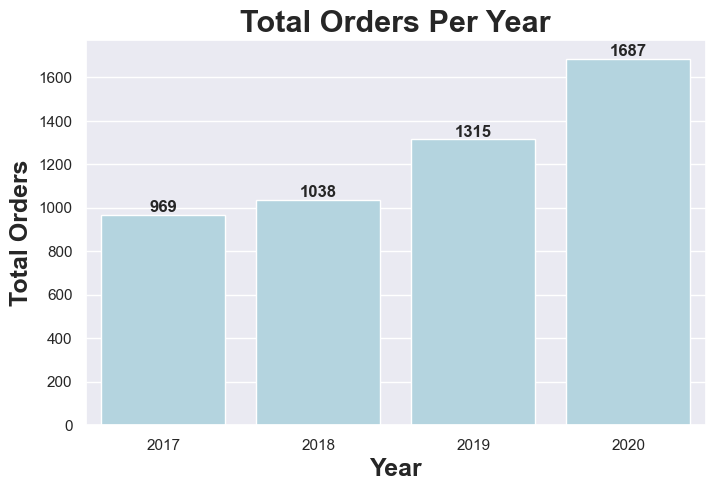

In [35]:
sns.set(rc={'figure.figsize':(8,5)})

ax_df_total_order = sns.barplot(data=df_total_order, x='Year', y='Order_ID', color='lightblue')
ax_df_total_order.set_title('Total Orders Per Year', fontdict={'size': 22, 'weight': 'bold'})
ax_df_total_order.set_xlabel('Year', fontdict={'size': 18, 'weight': 'bold'})
ax_df_total_order.set_ylabel('Total Orders', fontdict={'size': 18, 'weight': 'bold'})

for p in ax_df_total_order.patches:
    height = p.get_height()
    ax_df_total_order.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2, height), ha='center', va='bottom', fontsize=12, fontweight='bold')

In [187]:
df_total_order_2 = df.groupby(['Year', 'Category'], as_index=False)['Order_ID'].nunique()

df_total_order_2

,Year,Category,Order_ID
0,2017,Furniture,353
1,2017,Office Supplies,746
2,2017,Technology,291
3,2018,Furniture,371
4,2018,Office Supplies,778
5,2018,Technology,338
6,2019,Furniture,476
7,2019,Office Supplies,946
8,2019,Technology,389
9,2020,Furniture,564


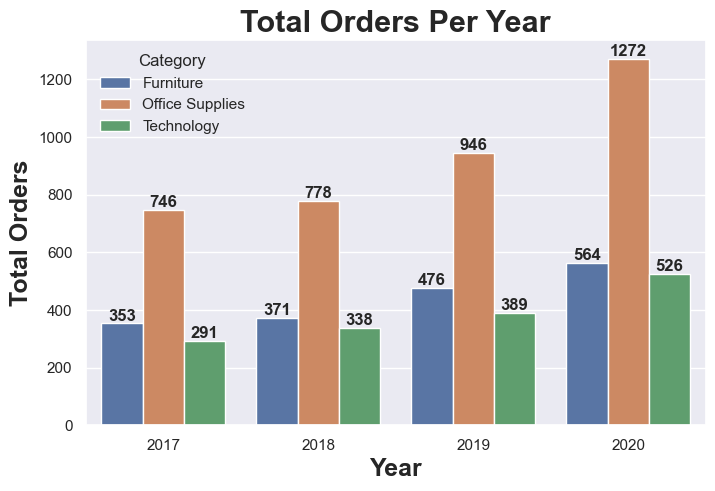

In [193]:
sns.set(rc={'figure.figsize':(8,5)})

ax_df_total_order_2 = sns.barplot(data=df_total_order_2, x='Year', y='Order_ID', hue='Category')
ax_df_total_order_2.set_title('Total Orders Per Year', fontdict={'size': 22, 'weight': 'bold'})
ax_df_total_order_2.set_xlabel('Year', fontdict={'size': 18, 'weight': 'bold'})
ax_df_total_order_2.set_ylabel('Total Orders', fontdict={'size': 18, 'weight': 'bold'})

for p in ax_df_total_order_2.patches:
    height = p.get_height()
    ax_df_total_order_2.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2, height), ha='center', va='bottom', fontsize=12, fontweight='bold')

### Sales and Profit per Year

In [156]:
df['Total_Sales_Year'] = df.groupby('Year')['Sales'].transform('sum')
df['Total_Profit_Year'] = df.groupby('Year')['Profit'].transform('sum')

In [168]:
# sales

df_sales_year = df.groupby(['Year', 'Category'], as_index=False).agg(total_sales = ('Sales', pd.Series.sum))

df_sales_year

,Year,Category,total_sales
0,2017,Furniture,157192.8531
1,2017,Office Supplies,151776.4120
2,2017,Technology,175278.2330
3,2018,Furniture,170518.2370
4,2018,Office Supplies,137233.4630
5,2018,Technology,162780.8090
6,2019,Furniture,198901.4360
7,2019,Office Supplies,183939.9820
8,2019,Technology,226364.1800
9,2020,Furniture,215387.2692


In [131]:
df_sales_year_pivot = pd.pivot_table(
    data=df,
    index='Year',
    columns=['Category', 'Sub-Category'],
    values='Sales',
    aggfunc='sum'
)

df_sales_year_pivot.head()

Category       Furniture                                    Office Supplies  \
Sub-Category   Bookcases     Chairs Furnishings      Tables      Appliances   
Year                                                                          
2017          20036.6776  77241.576   13826.234  46088.3655       15313.625   
2018          38543.5725  71734.529   21089.712  39150.4235       23241.289   
2019          26275.4665  83918.645   27874.124  60833.2005       26050.315   
2020          30024.2797  95554.353   28915.094  60893.5425       42926.932   

Category                                                                    \
Sub-Category       Art    Binders Envelopes Fasteners    Labels      Paper   
Year                                                                         
2017          6057.982  43488.265  3855.750   661.328  2841.394  14834.956   
2018          6236.834  37453.098  4512.188   545.224  2956.462  15287.638   
2019          5960.908  49683.325  4729.890   960.134  2827.240  20661.894   
2020          8863.068  72788.045  3378.574   857.594  3861.216  27694.718   

Category                            Technology                        \
Sub-Category    Storage   Supplies Accessories    Copiers   Machines   
Year                                                                   
2017          50329.042  14394.070   25014.272  10849.782  62023.373   
2018          45048.248   1952.482   40523.960  26179.450  27763.697   
2019          58788.700  14277.576   41895.854  49599.410  55906.886   
2020          69677.618  16049.410   59946.232  62899.388  43544.675   

Category                  
Sub-Category      Phones  
Year                      
2017           77390.806  
2018           68313.702  
2019           78962.030  
2020          105340.516

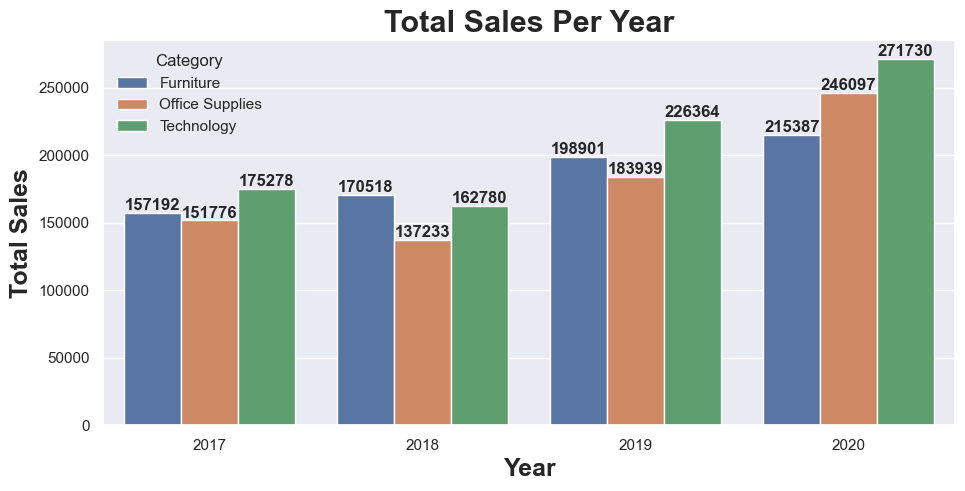

In [170]:
sns.set(rc={'figure.figsize':(11,5)})

ax_df_sales_year = sns.barplot(data=df_sales_year, x='Year', y='total_sales', hue='Category')
ax_df_sales_year.set_title('Total Sales Per Year', fontdict={'size': 22, 'weight': 'bold'})
ax_df_sales_year.set_xlabel('Year', fontdict={'size': 18, 'weight': 'bold'})
ax_df_sales_year.set_ylabel('Total Sales', fontdict={'size': 18, 'weight': 'bold'})

for p in ax_df_sales_year.patches:
    height = p.get_height()
    ax_df_sales_year.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2, height), ha='center', va='bottom', fontsize=12, fontweight='bold')

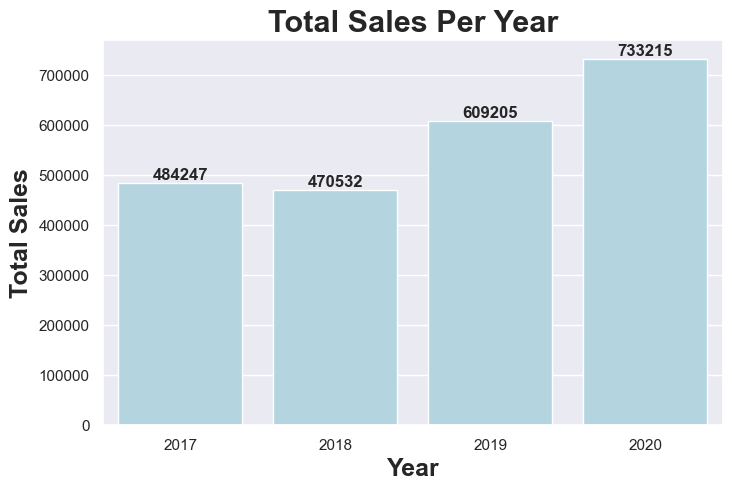

In [183]:
sns.set(rc={'figure.figsize':(8,5)})

ax_df_sales_year = sns.barplot(data=df, x='Year', y='Total_Sales_Year', color='lightblue')
ax_df_sales_year.set_title('Total Sales Per Year', fontdict={'size': 22, 'weight': 'bold'})
ax_df_sales_year.set_xlabel('Year', fontdict={'size': 18, 'weight': 'bold'})
ax_df_sales_year.set_ylabel('Total Sales', fontdict={'size': 18, 'weight': 'bold'})

for p in ax_df_sales_year.patches:
    height = p.get_height()
    ax_df_sales_year.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2, height), ha='center', va='bottom', fontsize=12, fontweight='bold')

In [176]:
# Profit
df_profit_year = df.groupby(['Year'], as_index=False).agg(total_profit = ('Profit', pd.Series.sum))

df_profit_year

,Year,total_profit
0,2017,49543.9741
1,2018,61618.6037
2,2019,81795.1743
3,2020,93439.2696


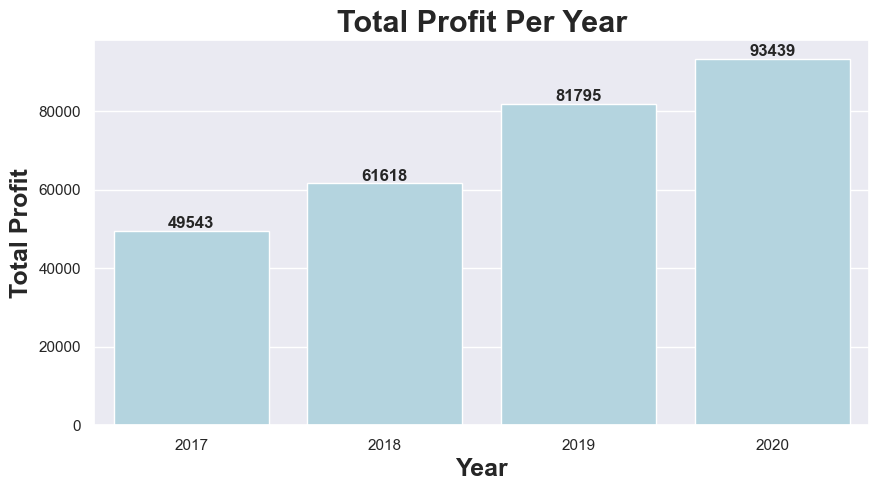

In [182]:
sns.set(rc={'figure.figsize':(10,5)})

ax_df_profit_year = sns.barplot(data=df_profit_year, x='Year', y='total_profit', color='lightblue')
ax_df_profit_year.set_title('Total Profit Per Year', fontdict={'size': 22, 'weight': 'bold'})
ax_df_profit_year.set_xlabel('Year', fontdict={'size': 18, 'weight': 'bold'})
ax_df_profit_year.set_ylabel('Total Profit', fontdict={'size': 18, 'weight': 'bold'})

for p in ax_df_profit_year.patches:
    height = p.get_height()
    ax_df_profit_year.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2, height), ha='center', va='bottom', fontsize=12, fontweight='bold')

In [178]:
df_profit_year_2 = df.groupby(['Year', 'Category'], as_index=False).agg(total_profit = ('Profit', pd.Series.sum))

df_profit_year_2

,Year,Category,total_profit
0,2017,Furniture,5457.7255
1,2017,Office Supplies,22593.4161
2,2017,Technology,21492.8325
3,2018,Furniture,3015.2029
4,2018,Office Supplies,25099.5338
5,2018,Technology,33503.8670
6,2019,Furniture,6959.9531
7,2019,Office Supplies,35061.2292
8,2019,Technology,39773.9920
9,2020,Furniture,3018.3913


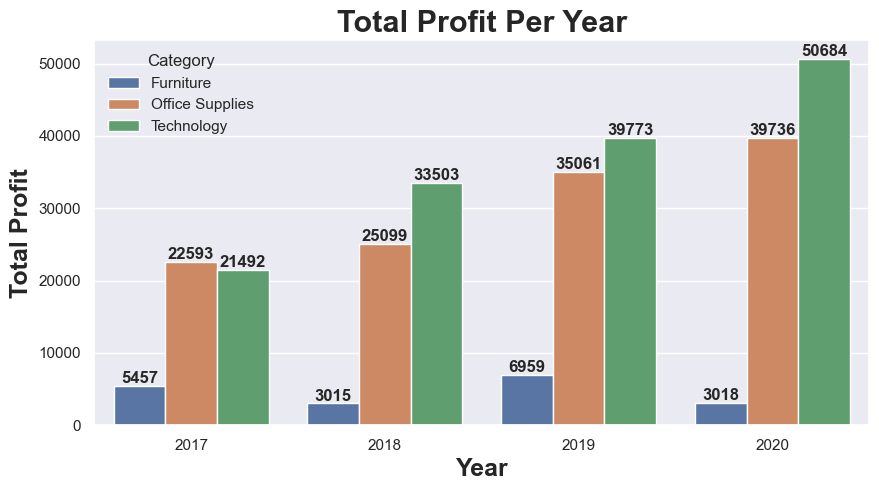

In [181]:
sns.set(rc={'figure.figsize':(10,5)})

ax_df_profit_year_2 = sns.barplot(data=df_profit_year_2, x='Year', y='total_profit', hue='Category')
ax_df_profit_year_2.set_title('Total Profit Per Year', fontdict={'size': 22, 'weight': 'bold'})
ax_df_profit_year_2.set_xlabel('Year', fontdict={'size': 18, 'weight': 'bold'})
ax_df_profit_year_2.set_ylabel('Total Profit', fontdict={'size': 18, 'weight': 'bold'})

for p in ax_df_profit_year_2.patches:
    height = p.get_height()
    ax_df_profit_year_2.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2, height), ha='center', va='bottom', fontsize=12, fontweight='bold')

### Heatmap

In [114]:
df_heatmap_region_category = pd.pivot_table(
    data=df,
    index='Region',
    columns='Category',
    values='Sales',
    aggfunc='sum'
)

df_heatmap_region_category.head()

Category,Furniture,Office Supplies,Technology
Region,,,
Central,163797.1638,167026.415,170416.312
East,208291.2040,205516.055,264973.981
South,117298.6840,125651.313,148771.908
West,252612.7435,220853.249,251991.832


Text(92.25, 0.5, 'Region')

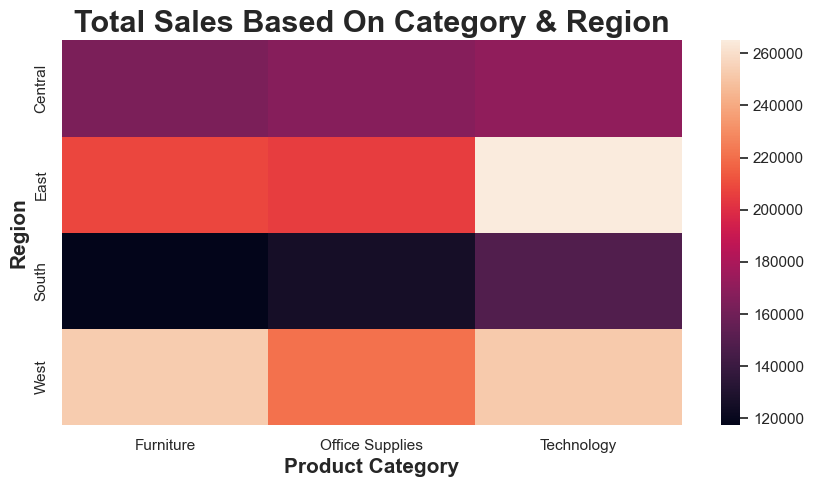

In [116]:
sns.set(rc={'figure.figsize':(10,5)})

ax_heatmap_reg_category = sns.heatmap(data=df_heatmap_region_category)
ax_heatmap_reg_category.set_title('Total Sales Based On Category & Region', fontdict={'size':22, 'weight':'bold'})
ax_heatmap_reg_category.set_xlabel('Product Category', fontdict={'size':15, 'weight':'bold'})
ax_heatmap_reg_category.set_ylabel('Region', fontdict={'size':15, 'weight':'bold'})

In [101]:
df_heatmap_state_category = pd.pivot_table(
    data=df,
    index='State',
    columns='Category',
    values='Sales',
    aggfunc='sum'
)

df_heatmap_state_category.head()

Category,Furniture,Office Supplies,Technology
State,,,
Alabama,6332.4800,4209.080,8969.080
Arizona,13525.2910,10005.825,11750.885
Arkansas,3187.5500,4565.330,3925.250
California,156064.6015,142351.948,159271.082
Colorado,13243.0370,7898.752,10966.329


Text(192.25, 0.5, 'State')

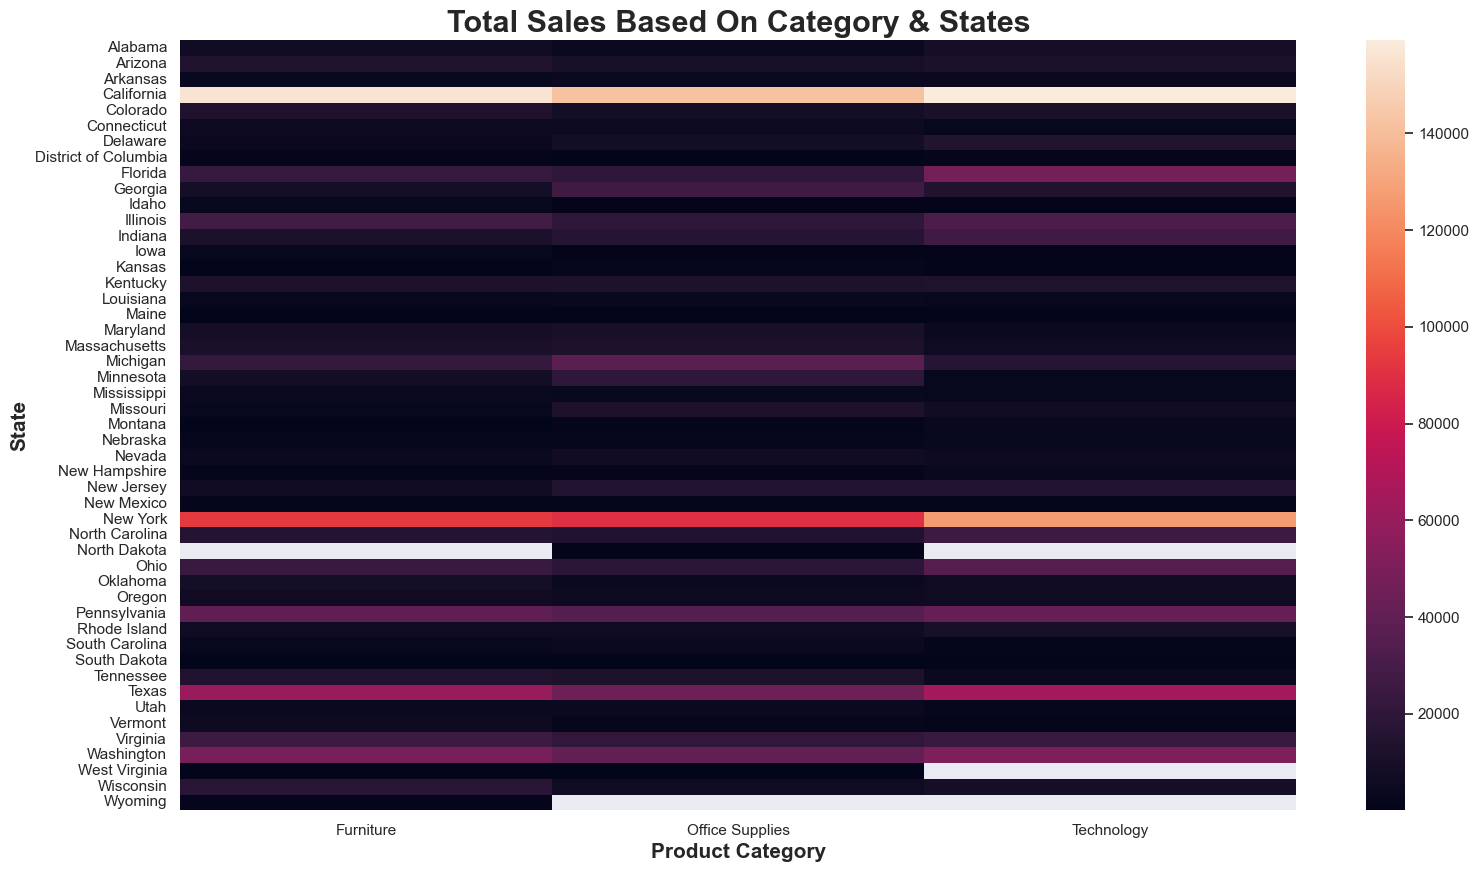

In [108]:
sns.set(rc={'figure.figsize':(18,10)})

ax_heatmap = sns.heatmap(data=df_heatmap_state_category)
ax_heatmap.set_title('Total Sales Based On Category & States', fontdict={'size':22, 'weight':'bold'})
ax_heatmap.set_xlabel('Product Category', fontdict={'size':15, 'weight':'bold'})
ax_heatmap.set_ylabel('State', fontdict={'size':15, 'weight':'bold'})

In [109]:
df_heatmap_state_sub_category = pd.pivot_table(
    data=df,
    index='State',
    columns='Sub-Category',
    values='Sales',
    aggfunc='sum'
)

df_heatmap_state_sub_category.head()

Sub-Category,Accessories,Appliances,Art,Binders,Bookcases,Chairs,Copiers,Envelopes,Fasteners,Furnishings,Labels,Machines,Paper,Phones,Storage,Supplies,Tables
State,,,,,,,,,,,,,,,,,
Alabama,2322.830,208.160,301.210,466.820,NaN,3915.540,899.970,105.84,3.620,40.480,506.490,3040.000,883.020,2706.280,1249.410,484.510,2376.460
Arizona,3396.160,774.432,1389.152,2185.353,519.2130,6499.080,NaN,214.52,101.232,2511.648,27.464,965.949,2440.760,7388.776,2590.384,282.528,3995.350
Arkansas,1788.440,NaN,78.300,2889.830,638.8200,1673.280,NaN,311.70,42.670,573.490,7.310,NaN,805.520,2136.810,430.000,NaN,301.960
California,37255.010,24175.920,5495.660,28473.168,27558.5215,63079.368,24559.520,3237.34,479.530,19996.480,2899.140,29492.016,16757.950,67964.536,45112.290,15720.950,45430.232
Colorado,2287.992,1367.296,210.624,508.968,1583.5230,8244.816,439.992,75.60,44.520,1957.568,17.960,3313.689,883.216,4924.656,3387.168,1403.400,1457.130


Text(192.25, 0.5, 'State')

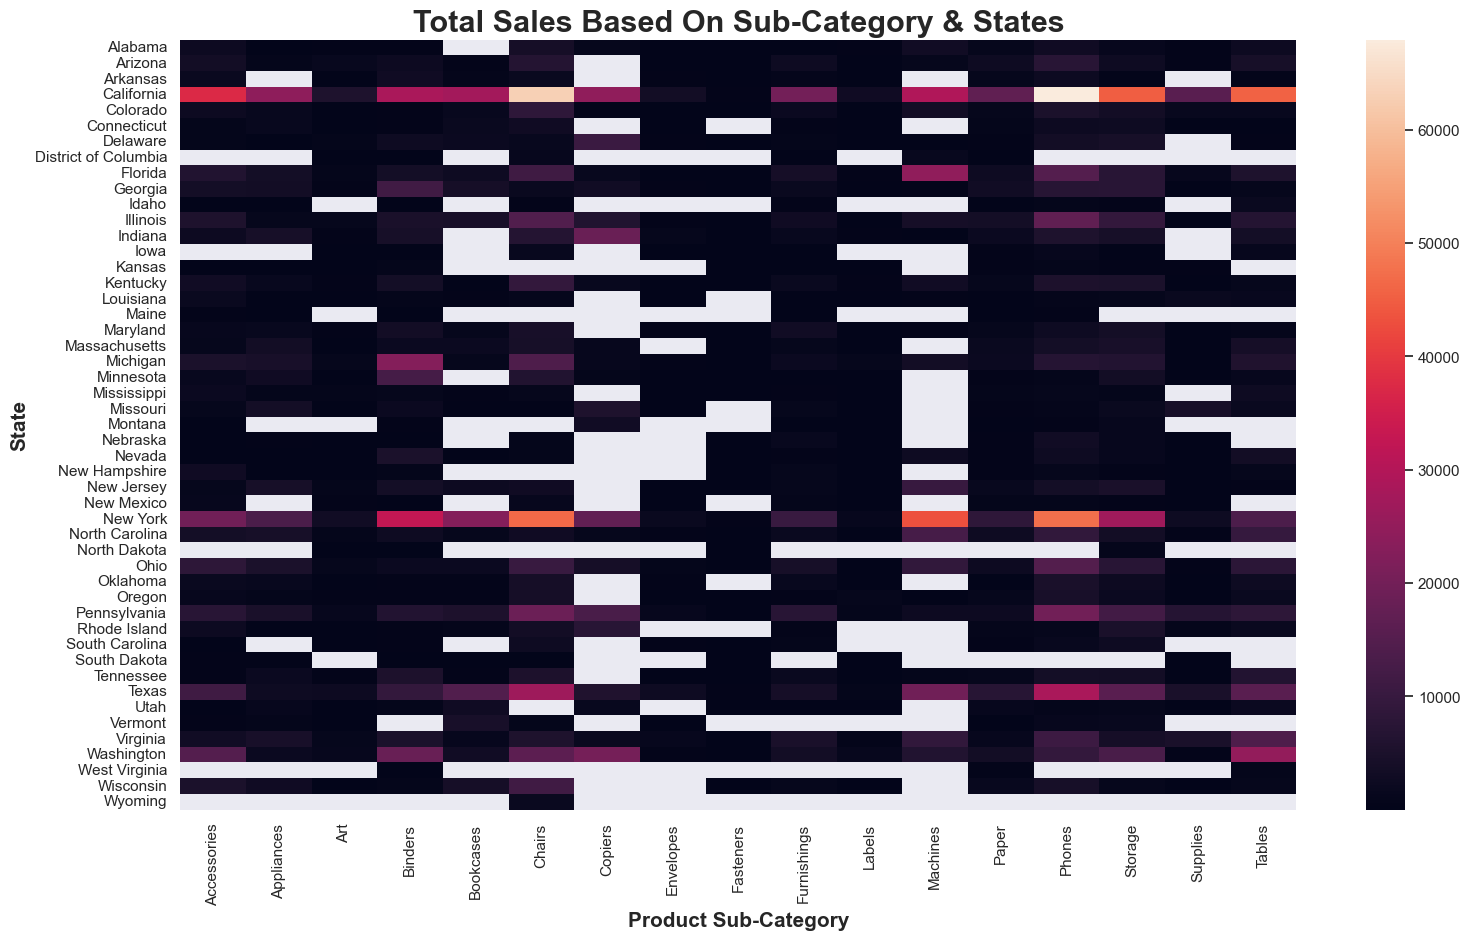

In [111]:
sns.set(rc={'figure.figsize':(18,10)})

ax_heatmap_sub_category = sns.heatmap(data=df_heatmap_state_sub_category)
ax_heatmap_sub_category.set_title('Total Sales Based On Sub-Category & States', fontdict={'size':22, 'weight':'bold'})
ax_heatmap_sub_category.set_xlabel('Product Sub-Category', fontdict={'size':15, 'weight':'bold'})
ax_heatmap_sub_category.set_ylabel('State', fontdict={'size':15, 'weight':'bold'})

In [112]:
df_heatmap_region_sub_category = pd.pivot_table(
    data=df,
    index='Region',
    columns='Sub-Category',
    values='Sales',
    aggfunc='sum'
)

df_heatmap_region_sub_category.head()

Sub-Category,Accessories,Appliances,Art,Binders,Bookcases,Chairs,Copiers,Envelopes,Fasteners,Furnishings,Labels,Machines,Paper,Phones,Storage,Supplies,Tables
Region,,,,,,,,,,,,,,,,,
Central,33956.076,23582.033,5765.340,56923.282,24157.1768,85230.646,37259.570,4636.872,778.030,15254.370,2451.472,26797.384,17491.902,72403.282,45930.112,9467.372,39154.971
East,45033.372,34188.466,7485.764,53497.997,43819.3340,96260.683,53219.462,4375.874,819.718,29071.380,2602.934,66106.165,20172.602,100614.982,71612.584,10760.116,39139.807
South,27276.754,19525.326,4655.622,37030.341,10899.3620,45176.446,9299.756,3345.556,503.316,17306.684,2353.180,53890.960,14150.984,58304.438,35768.060,8318.928,43916.192
West,61114.116,30236.336,9212.066,55961.113,36004.1235,101781.328,49749.242,4118.100,923.216,30072.730,5078.726,42444.122,26663.718,98684.352,70532.852,18127.122,84754.562


Text(292.25, 0.5, 'Region')

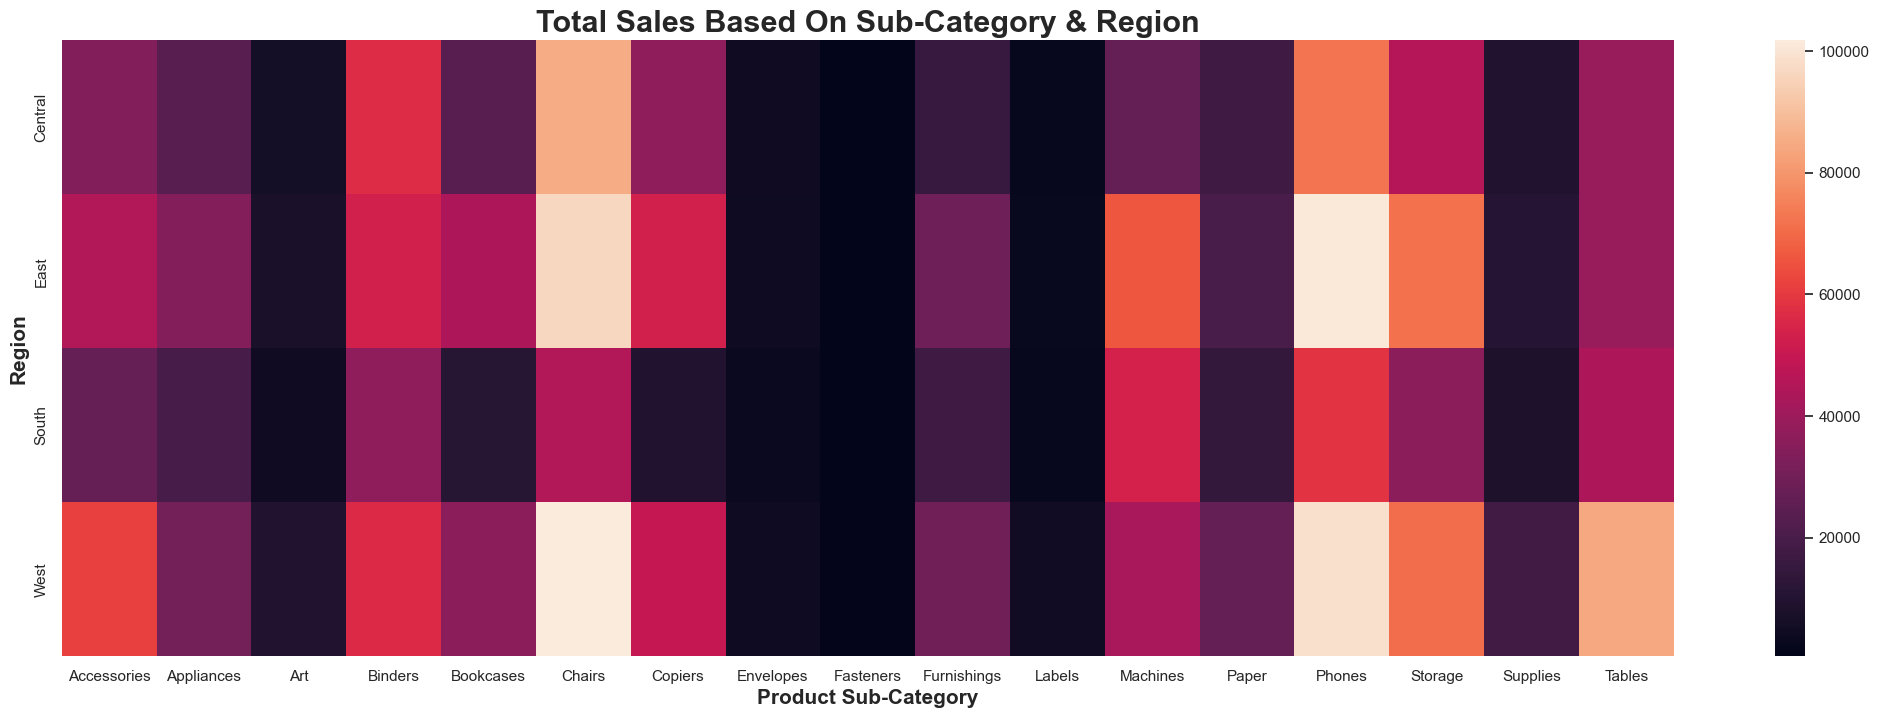

In [121]:
sns.set(rc={'figure.figsize':(26,8)})

ax_heatmap_region_sub = sns.heatmap(data=df_heatmap_region_sub_category)
ax_heatmap_region_sub.set_title('Total Sales Based On Sub-Category & Region', fontdict={'size':22, 'weight':'bold'})
ax_heatmap_region_sub.set_xlabel('Product Sub-Category', fontdict={'size':15, 'weight':'bold'})
ax_heatmap_region_sub.set_ylabel('Region', fontdict={'size':15, 'weight':'bold'})